## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [2]:
#Loading data from Pandas library

try:
    df = pd.read_csv('tips.csv')
    
    #Reading first few data
    print(df.head())
    
# Handling specific exceptions    
except FileNotFoundError as e:
    print(f"Error: The specified file 'tips.csv' is not found. {e}")
except pd.errors.EmptyDataError as e:
    print(f"Error: The file 'tips.csv' is empty {e}")
except pd.errors.ParseError as e:
    print(f"Error: Unable to parse the data in 'tips.csv'. please check the file format {e}")

# Handling generic exceptions
except Exception as e:
    print(f"An unexpected error occured: {str(e)}")

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 1. Make a list of categorical and numerical columns in the data.

In [4]:
#intialize empty lists for categorical and numerical columns available in the data set
categorical = []
numerical = []

#iterate over the columns and determine the data type
for i in df.columns:
    if df[i].dtypes == 'object':
        categorical.append(i)
    else:
        numerical.append(i)
        
#Print the columns data
print(' Categorical columns are: ',categorical)
print('\n Numerical columns are: ',numerical)

 Categorical columns are:  ['sex', 'smoker', 'day', 'time']

 Numerical columns are:  ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [5]:
print('Average bill amount for each day: ')
avgbill = df.groupby('day')['total_bill'].mean()
pd.DataFrame(avgbill)

Average bill amount for each day: 


,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


### 3. Which gender is more generous in giving tips?

In [6]:
# Grouping the DataFrame 'df' by the 'sex' column and calculating the mean of the 'tip' column for each gender
Generous_gender = df.groupby('sex')['tip'].mean()

# Displaying the average tip for each gender
print('Average Tip of each gender: \n',Generous_gender)

# Finding and displaying the most generous gender in terms of tip, along with the corresponding value
print('\nThe most generous gender giving Tip is: [',Generous_gender.idxmax(), '] with value: ', max(Generous_gender))

Average Tip of each gender: 
 sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

The most generous gender giving Tip is: [ Male ] with value:  3.0896178343949043


### 4. According to the data, were there more customers for dinner or lunch?

In [7]:
# Grouping the DataFrame 'df' by the 'time' column and counting 
# the number of occurrences of each time category in the 'size' column
x = df.groupby('time')['size'].count()

#Displaying the count of customer for each time category
print(x)

# Find and displaying meal time value with most customer 
print('\nMore Customers for meals: [', x.idxmax(), '], Value:', max(x) )

time
Dinner    176
Lunch      68
Name: size, dtype: int64

More Customers for meals: [ Dinner ], Value: 176


In [8]:
# We can use sum() method as well for this 
# sum() method helps us to find that in the size column along with Lunch and Dinner count of all peoples 
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

By using sum() method we can see that the more people has came for dinner and the amount were 463.

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
df['tip'].describe().T

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### Inferences



* There is 244 rows and no missing values.
* The average is around 2.9 suggesting that on avg customers tends to leave this amount.
* The minimum tip recorded is 1.0. This is the smallest observerd tip in dataset.
* The 25th and 75th percentiles are 2 and 3.5625, respectively. This suggests a range of tipping behavior, with most tips falling within the lower to mid-range values, but some customers opting for higher tips, as evidenced by the maximum value(10).
* All customers are giving the tip and there could be some possibility of outliers.

### 6. Find the busiest day in terms of the orders?

In [10]:
# Grouping the dataframe 'df' by the 'day' column and calculating sum of 'size' column for each day
busyday = df.groupby('day')['size'].sum()

#Displaying total no of orders for each day
print(busyday)

#Displaying bussiest day along with total no of orders
print("\nBusiest day in terms of orders is: [", busyday.idxmax(), '] with', max(busyday))

day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64

Busiest day in terms of orders is: [ Sat ] with 219


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [11]:
# Checking skeweness of total_bill
df.total_bill.skew()

1.1332130376158205

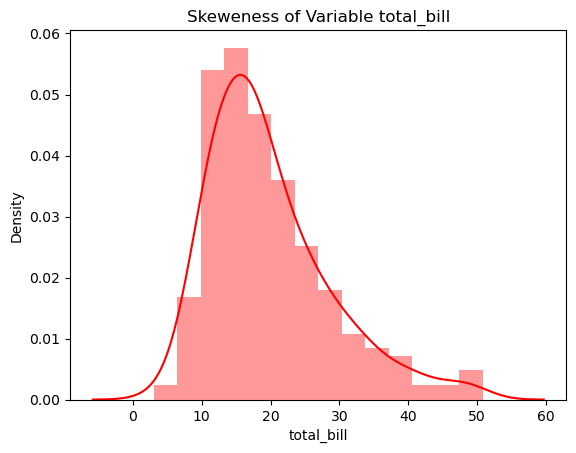

In [12]:
# Plotting the skeweness of 'total_bill' column with distplot from seaborn
sns.distplot(df['total_bill'], color='red')

# Adding a title to the plot
plt.title('Skeweness of Variable total_bill')
plt.show()

### Inferences:

* The Skew value of column 'total_bill' is 1.1332130 (greater than 1) and the plots tail is towards right hand side.
* so it means it is positively skewed or Right-skewed.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [13]:
# Displaying the correlation between the 'tip' and 'total_bill' columns in the DataFrame 'df'
print('Correlation between Tip and Total Bill: ')

# Calculating and printing the correlation matrix for the specified columns
df[['tip', 'total_bill']].corr()

Correlation between Tip and Total Bill: 


,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


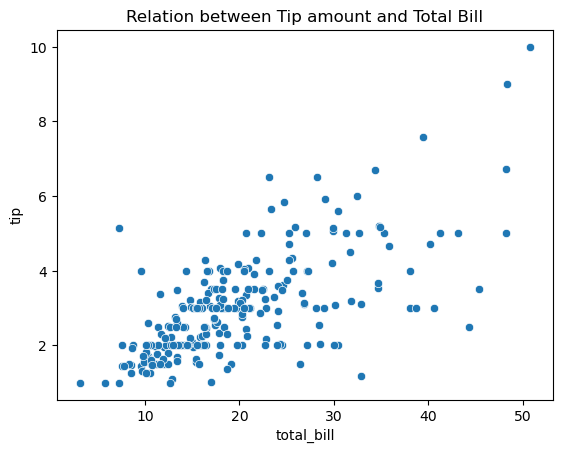

In [14]:
#Creating scatter plot to visualize realtion between 'tip' and 'total_bill'
sns.scatterplot(x='total_bill',y='tip',data=df)

# Adding a title to the plot
plt.title('Relation between Tip amount and Total Bill')
plt.show()

### Inferences:

* Yes, From The above scatter plot , we can see tip is dependent on the total bill amount.
* Here tip has a moderate positive correlation with the total bill. 
* The more the bill amount higher the tip.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [15]:
# Calculating and displaying the percentage of males and females in the 'sex' column
df['sex'].value_counts(normalize=True)*100

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64

### Inferences:

*  The output indicates that the dataset is predominantly composed of males (64.34%) compared to females (35.66%). 
* This gender distribution suggests a potential imbalance that may impact the interpretation of analyses or modeling results.

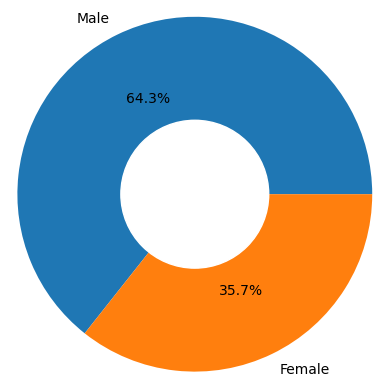

In [16]:
# Creating a pie chart to visualize the distribution of 'Male' and 'Female' in the 'sex' column. 
plt.pie(df.sex.value_counts(), autopct = '%.1f%%', radius= 1.2, 
        labels= ['Male', 'Female'])

#add a circle in the center to create a donut chart effect
circle = plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)

#display the plot
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [17]:
# df.groupby('sex')['smoker'].value_counts()
pd.crosstab(df['smoker'],df['sex'])

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


Text(0.5, 1.0, 'Distribution of Smoker Status by Gender')

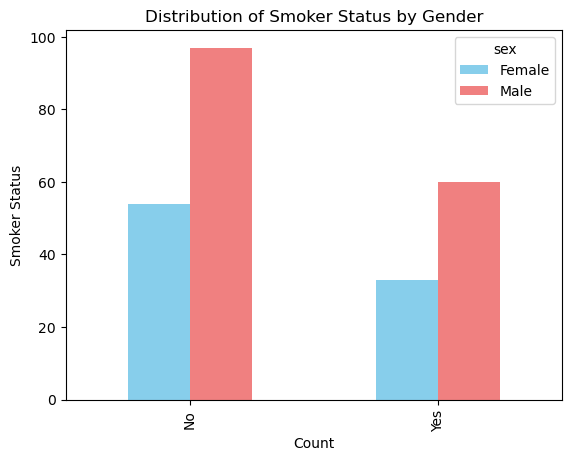

In [18]:
# creating a cross-tabulation between 'smoker' and 'sex' and plotting result as bar chart
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar', color=['skyblue', 'lightcoral'])

# Adding labels to the plot
plt.xlabel('Count')
plt.ylabel('Smoker Status')
plt.title('Distribution of Smoker Status by Gender')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [19]:
# Checking the average Tip amount
# Grouping dataframe 'df' by the 'day' column and calculating the mean of 'tip' column for each day
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

Text(0, 0.5, 'Average Tip')

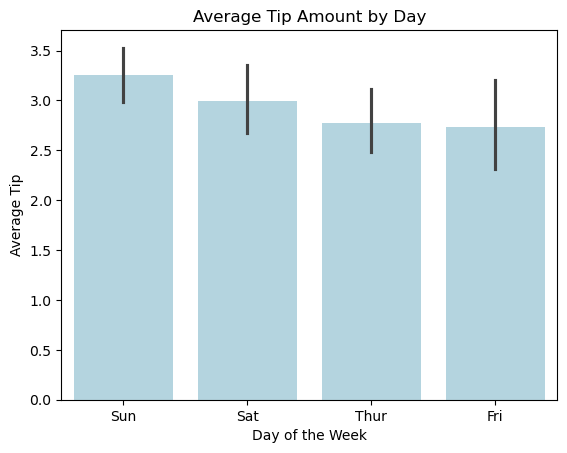

In [20]:
#Creating a bar plot using seaborn to visualize the relationship between 'day' and 'tip'.
sns.barplot(x='day', y='tip', data=df, color='lightblue')

# Adding a title to the plot
plt.title('Average Tip Amount by Day')

# Adding labels to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip')

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

Result
 size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64 



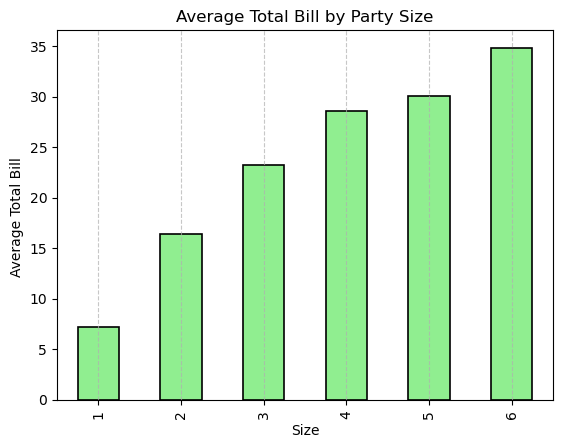

In [21]:
# Calculating the mean of 'total_bill' grouped by 'size' and storing the result in the variable 'x'
x = df.groupby('size')['total_bill'].mean()

# Creating a horizontal bar plot to visualize the mean 'total_bill' for each 'size'
x.plot(kind='bar', color='lightgreen', edgecolor='black', linewidth=1.2)

# Adding labels to the plot
plt.xlabel('Size')
plt.ylabel('Average Total Bill ')
plt.title('Average Total Bill by Party Size')

#Displaying the plot with grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

print('Result\n', x, '\n')
plt.show()

### Inferences: 


* Yes average bill amount is dependent upon the size of group. 
* From above chart, as the size of group increases the average bill amount also increases.
* There is a linear dependency between group size and bill amount paid

In [22]:
# Approach: 2
# Using seaborn library
# sns.heatmap(df[['total_bill','size']].corr(), annot=True)

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

Text(0, 0.5, 'Gender')

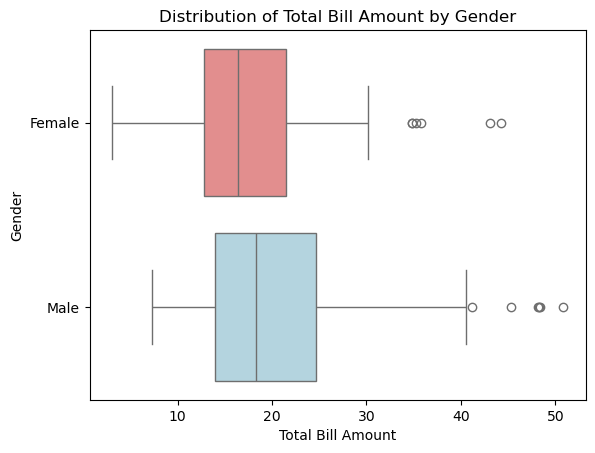

In [23]:
# Creating a box plot using Seaborn to visualize the distribution of 'total_bill' for each 'sex'
sns.boxplot(x='total_bill', y='sex', data=df, palette={'Male': 'lightblue', 'Female': 'lightcoral'})

plt.title('Distribution of Total Bill Amount by Gender')

# Adding labels to the plot
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [24]:
# Grouping the DataFrame 'df' by 'time' and 'day', 
# and calculating the maximum 'total_bill' for each group
df_x = df.groupby(['time','day'], as_index=False)['total_bill'].max()

# Filtering the results to include only rows where the day is either 'Sat' or 'Sun'
df_x [(df_x['day'] == 'Sat') | (df_x['day'] == 'Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


### Inferences:

* We can see that the maximum bill amount for saturday is '50.81' and sunday is '48.17'.

### 15. Compute the percentage of missing values in the dataset.

In [25]:
print('Percentage of missing values in the dataset: \n')

# Calculating the percentage of missing values for each column in the DataFrame 'df'
df.isnull().sum()/len(df)*100

Percentage of missing values in the dataset: 



total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [26]:
#Printing the no. of duplicated data
print('Number of Duplicates record: ', len(df[df.duplicated()]))

#Getting the duplicated data
df[df.duplicated]

Number of Duplicates record:  1


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [27]:
# Dropping the duplicate record
df.drop_duplicates(inplace=True)

In [28]:
print('Number of Duplicates record: ', len(df[df.duplicated()]))

#Printing the info
df.info()

Number of Duplicates record:  0
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  243 non-null    float64
 1   tip         243 non-null    float64
 2   sex         243 non-null    object 
 3   smoker      243 non-null    object 
 4   day         243 non-null    object 
 5   time        243 non-null    object 
 6   size        243 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


### Inferences:

* We can observe that initially Total Records were 244.
* After Removing the duplicated Record the new Record became 243.
* The Duplicted Records are removed Successfully.

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

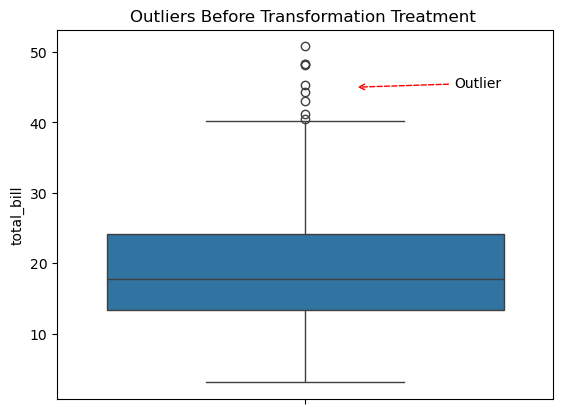

In [29]:
# Before Treatment:- Outliers Recognition

# Creating a boxplot to visualize the distribution of 'total_bill' before treatment
sns.boxplot(df['total_bill'])

plt.title('Outliers Before Transformation Treatment ')

# Adding an arrow and label for the outlier using annotate
plt.annotate('Outlier', xy=(0.1, 45), xytext=(0.3, 45),
             arrowprops=dict(arrowstyle='->', linestyle='dashed', color='red'))


plt.show()

We can see there is some Outliers present in 'total_bill'. For Removing this outliers for better performance we can use log transformation.

Text(0.5, 1.0, 'Outliers After Transformation Treatment ')

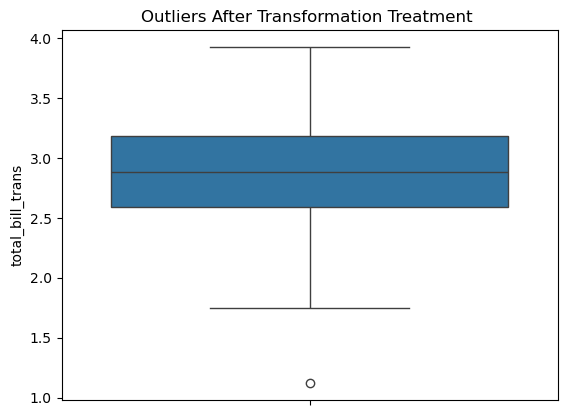

In [30]:
#Log Transformation

df['total_bill_trans'] = np.log(df['total_bill'])

#After Treatment:- Checking outliers

sns.boxplot(df['total_bill_trans'])
plt.title('Outliers After Transformation Treatment ')

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

Text(0.5, 1.0, 'Outliers Before IQR Treatment ')

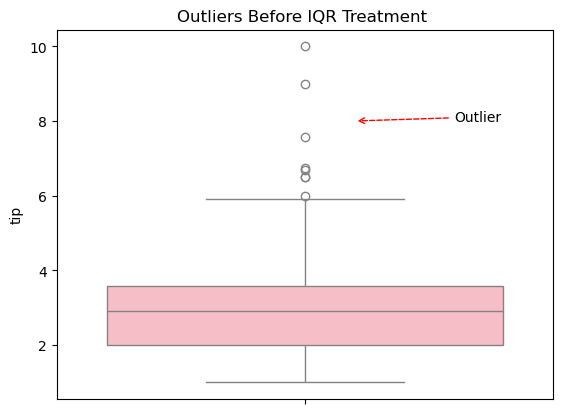

In [31]:
# Plotting the box plot to check outliers
sns.boxplot(df['tip'], color='lightpink')


# Adding an arrow and label for the outlier using annotate
plt.annotate('Outlier', xy=(0.1, 8), xytext=(0.3, 8),
             arrowprops=dict(arrowstyle='->', linestyle='dashed', color='red'))

plt.title('Outliers Before IQR Treatment ')

In [32]:
#IQR Treatment for outliers

# Calculating the first quartile (Q1) and third quartile (Q3) for the 'tip' column
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)

#Inter quartile range
IQR = Q3 - Q1

# Calculating the lower and higher whiskers to identify potential outliers
lower_whisker =  Q1 - (1.5 * IQR)
higher_whisker = Q3 + (1.5 * IQR)
print('Lower Whisker: ',lower_whisker, '\nUpper Whisker: ',higher_whisker  )

# Creating a new DataFrame 'df_out' by excluding outliers based on the calculated whiskers
df_out = df.loc[(df['tip'] < higher_whisker) & (df['tip'] > lower_whisker)]

Lower Whisker:  -0.36250000000000027 
Upper Whisker:  5.9375


Text(0.5, 1.0, 'Outliers After IQR Treatment ')

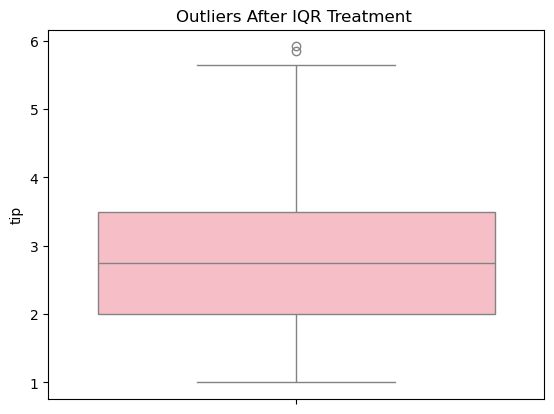

In [33]:
# Plotting the box plot to check outliers

sns.boxplot(df_out['tip'], color='lightpink')
plt.title('Outliers After IQR Treatment ')

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [34]:
# Filter rows where 'Category' column has a categorical data type
categorical_rows = df.select_dtypes(include='object')
categorical_rows

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [35]:
# Encode the categorical columns in the dataset using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Print random 5 samples from the DataFrame
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
238,35.83,4.67,3,3.578786,False,False,True,False,False,False
163,13.81,2.00,2,2.625393,True,False,False,True,False,False
231,15.69,3.00,3,2.753024,True,True,True,False,False,False
157,25.00,3.75,4,3.218876,False,False,False,True,False,False
124,12.48,2.52,2,2.524127,False,False,False,False,True,True


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [36]:
# Checking min and max values of column 'total_bill'
maximum = df['total_bill'].max()
minimum = df['total_bill'].min()

# Original Range
Range = maximum - minimum
print('Original Range of column: ', Range)

Original Range of column:  47.74


In [37]:
# Initializing the variable
minmax = MinMaxScaler()

# Transform the Range of 'total_bill'
df['total_bill_mm'] = minmax.fit_transform(df[['total_bill']])

# Checking min and max values of column 'total_bill' after transformation
mm_maximum = df['total_bill_mm'].max()
mm_minimum = df['total_bill_mm'].min()

# New Range
mm_range = mm_maximum - mm_minimum
print('Transformed Range of column: ', mm_range)

Transformed Range of column:  0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [38]:
# Loading the data using seaborn library
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
# i) Encode the categorical variables.

tips_df = pd.get_dummies(tips_df, drop_first=True)
tips_df.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [40]:
#ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

# In-dependent Variable(X)
X = tips_df.drop('tip', axis=1)
print(X.head(2))

# Dependent Variable(y)
y = tips_df['tip']
print(y.head(2))

   total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99     2        True       True    False    False     True   
1       10.34     3       False       True    False    False     True   

   time_Dinner  
0         True  
1         True  
0    1.01
1    1.66
Name: tip, dtype: float64


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [41]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Initializing the MinMaxScaler
minmax = MinMaxScaler()

# Scaling the first two columns of the training set
X_train.iloc[:,:2] =  minmax.fit_transform(X_train.iloc[:,:2])

# Scaling the first two columns of the testing set using transform
X_test.iloc[:,:2] =  minmax.fit_transform(X_test.iloc[:,:2])

In [42]:
# checking few samples of X_train
X_train.iloc[:,:2].sample(5)

,total_bill,size
239,0.543779,0.4
213,0.213657,0.2
77,0.505446,0.6
143,0.502304,1.0
127,0.239841,0.2


In [43]:
# checking few samples of X_test
X_test.iloc[:,:2].sample(5)

,total_bill,size
89,0.339932,0.2
136,0.075269,0.2
42,0.163490,0.2
40,0.214809,0.4
71,0.239980,0.4


### Inferences: 

* Dataset has been splited into two variables independent(X) and dependent(y).
* 70% train and 30% test was done on data variable
* MinMaxScalling was done to standardize the columns 'total_bill' amd 'size'.
* due to MinMaxScaler  the range has been reduced to 0 to 1.

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [44]:
# Fitting Linear Regression
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Making predictions on the test set using the trained linear regression model
predictions = model.predict(X_test)
predictions

array([1.86296681, 1.4446756 , 1.22147172, 5.06617115, 5.27850177,
       2.21231823, 3.7408028 , 2.02699304, 3.51371041, 2.53786434,
       2.50814807, 1.45866708, 1.97383717, 1.843009  , 3.28020787,
       1.61642917, 2.55454257, 6.66571265, 1.73448948, 3.28166065,
       1.94866799, 3.45977189, 2.48820929, 3.22446158, 2.40647767,
       4.43585295, 2.31194594, 3.56959525, 4.10948407, 2.53751681,
       2.1381956 , 2.45465715, 3.49733953, 2.0330223 , 2.06808265,
       1.79722344, 4.32505786, 2.46758635, 1.8832262 , 2.54132134,
       3.31335835, 3.91181382, 2.74465139, 2.64685911, 2.90330122,
       2.26733436, 2.11522838, 1.63807639, 4.42932903, 3.11143228,
       2.8954469 , 1.73969799, 2.28914375, 2.18094488, 2.84625684,
       4.7471784 , 3.03512301, 2.80490745, 1.62548889, 2.06489288,
       1.79855877, 1.17350322, 1.96578429, 2.55143965, 2.56900067,
       1.53124341, 1.578368  , 2.19771495, 2.33317125, 3.50751409,
       5.09826886, 2.61953099, 5.57947147, 2.91979332])

In [46]:
# Computing r_squared value of the prediction on the test data

# Calculating the R-squared value on the test set
r2 = r2_score(y_test, predictions)
print('The r_squared value on test-data is: ' + str(r2))

The r_squared value on test-data is: 0.41117441193985393


### Happy Learning:)